In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st
import statsmodels.api as sm
from scipy.stats.contingency import association
from scipy.stats import chi2_contingency

%matplotlib inline

In [2]:
df_demo = pd.read_csv('df_final_demo.txt')
df_demo

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0
...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0


In [3]:
df_experiment = pd.read_csv('df_final_experiment_clients.txt')
df_experiment

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control
...,...,...
70604,2443347,NaN
70605,8788427,NaN
70606,266828,NaN
70607,1266421,NaN


In [4]:
df_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_1

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
343136,2443347,465784886_73090545671,136329900_10529659391_316129,confirm,2017-03-31 15:15:46
343137,2443347,465784886_73090545671,136329900_10529659391_316129,step_3,2017-03-31 15:14:53
343138,2443347,465784886_73090545671,136329900_10529659391_316129,step_2,2017-03-31 15:12:08
343139,2443347,465784886_73090545671,136329900_10529659391_316129,step_1,2017-03-31 15:11:37


In [5]:
df_2 = pd.read_csv('df_final_web_data_pt_2.txt')
df_2

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [6]:
df_web = pd.concat([df_1, df_2], axis=0)
df_web

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04
...,...,...,...,...,...
412259,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10
412260,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29
412261,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51
412262,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34


In [7]:
df = pd.merge(df_demo, df_experiment, on='client_id', how='left')
df

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [9]:
df = pd.merge(df_web, df, on='client_id', how='left')
df

,client_id,visitor_id,visit_id,process_step,date_time,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,5.0,64.0,79.0,U,2.0,189023.86,1.0,4.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755400,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:46:10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755401,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:45:29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755402,9668240,388766751_9038881013,922267647_3096648104_968866,step_1,2017-05-24 18:44:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
755403,9668240,388766751_9038881013,922267647_3096648104_968866,start,2017-05-24 18:44:34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.isnull().sum()

client_id                0
visitor_id               0
visit_id                 0
process_step             0
date_time                0
clnt_tenure_yr      305689
clnt_tenure_mnth    305689
clnt_age            305701
gendr               305689
num_accts           305689
bal                 305689
calls_6_mnth        305689
logons_6_mnth       305689
Variation           434096
dtype: int64

In [11]:
df.dropna(subset=['clnt_age', 'clnt_tenure_yr', 'clnt_tenure_mnth', 'gendr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth'], inplace=True)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 449704 entries, 0 to 755381
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   client_id         449704 non-null  int64  
 1   visitor_id        449704 non-null  object 
 2   visit_id          449704 non-null  object 
 3   process_step      449704 non-null  object 
 4   date_time         449704 non-null  object 
 5   clnt_tenure_yr    449704 non-null  float64
 6   clnt_tenure_mnth  449704 non-null  float64
 7   clnt_age          449704 non-null  float64
 8   gendr             449704 non-null  object 
 9   num_accts         449704 non-null  float64
 10  bal               449704 non-null  float64
 11  calls_6_mnth      449704 non-null  float64
 12  logons_6_mnth     449704 non-null  float64
 13  Variation         321195 non-null  object 
dtypes: float64(7), int64(1), object(6)
memory usage: 51.5+ MB


In [14]:
df.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,4.497040e+05,449704.000000,449704.000000,449704.000000,449704.000000,4.497040e+05,449704.000000,449704.000000
mean,5.002904e+06,12.234243,152.812170,47.653966,2.264774,1.597768e+05,3.529164,5.709842
std,2.873056e+06,7.005242,83.720383,15.742089,0.543080,3.420734e+05,2.242500,2.356200
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.515588e+06,6.000000,82.000000,33.500000,2.000000,3.844610e+04,2.000000,4.000000
50%,5.025355e+06,11.000000,139.000000,49.000000,2.000000,6.677571e+04,3.000000,6.000000
75%,7.468377e+06,16.000000,194.000000,60.000000,2.000000,1.490039e+05,6.000000,8.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [15]:
df['client_id'].nunique()

70594

In [21]:
potential_categorical_from_numerical = df.select_dtypes("number").loc[:, df.select_dtypes("number").nunique() < 20]
potential_categorical_from_numerical

,num_accts,calls_6_mnth,logons_6_mnth
0,2.0,1.0,4.0
1,2.0,1.0,4.0
2,2.0,1.0,4.0
3,2.0,1.0,4.0
4,2.0,1.0,4.0
...,...,...,...
755377,2.0,2.0,2.0
755378,2.0,2.0,2.0
755379,2.0,2.0,2.0
755380,2.0,2.0,2.0


In [22]:
df_categorical = pd.concat([df.select_dtypes("object"), potential_categorical_from_numerical], axis=1)

df_numerical = df.select_dtypes("number").drop(columns=potential_categorical_from_numerical.columns)

In [20]:
avg_age_tenure_by_gender = df.groupby('gendr')[['clnt_age', 'clnt_tenure_yr']].mean()
print(avg_age_tenure_by_gender)

        clnt_age  clnt_tenure_yr
gendr                           
F      50.701351       14.968291
M      49.811094       15.081507
U      42.554737        6.745548
X      42.142857        9.714286


/Users/kwameantwiadjei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


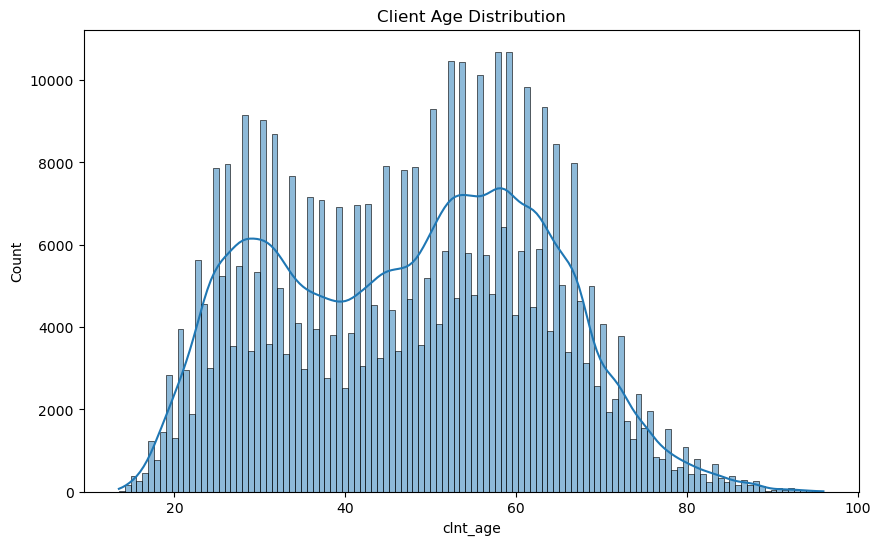

Average Client Age: 47.65396571967339


In [16]:
# Analyse client age distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='clnt_age', kde=True)
plt.title('Client Age Distribution')
plt.show()

print(f"Average Client Age: {df['clnt_age'].mean()}")

/Users/kwameantwiadjei/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


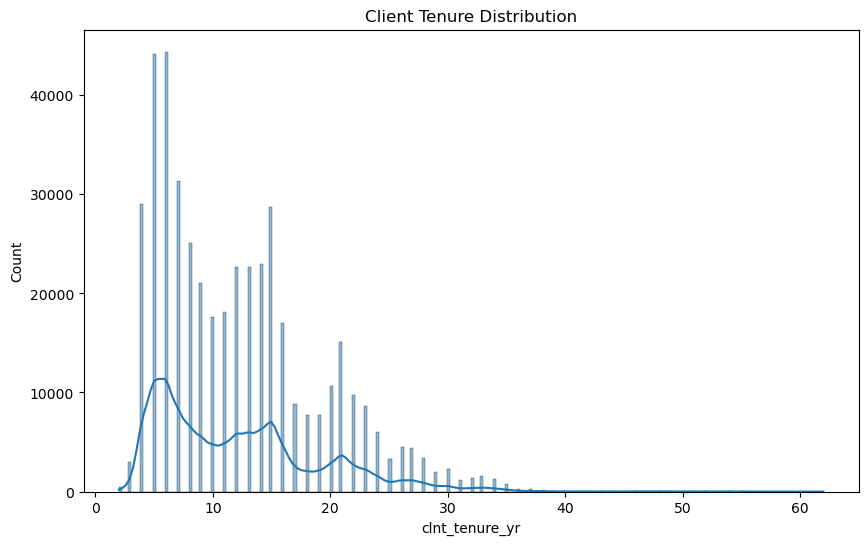

Average Client Tenure: 12.234242968708307


In [17]:
# Analyse client tenure distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='clnt_tenure_yr', kde=True)
plt.title('Client Tenure Distribution')
plt.show()

print(f"Average Client Tenure: {df['clnt_tenure_yr'].mean()}")

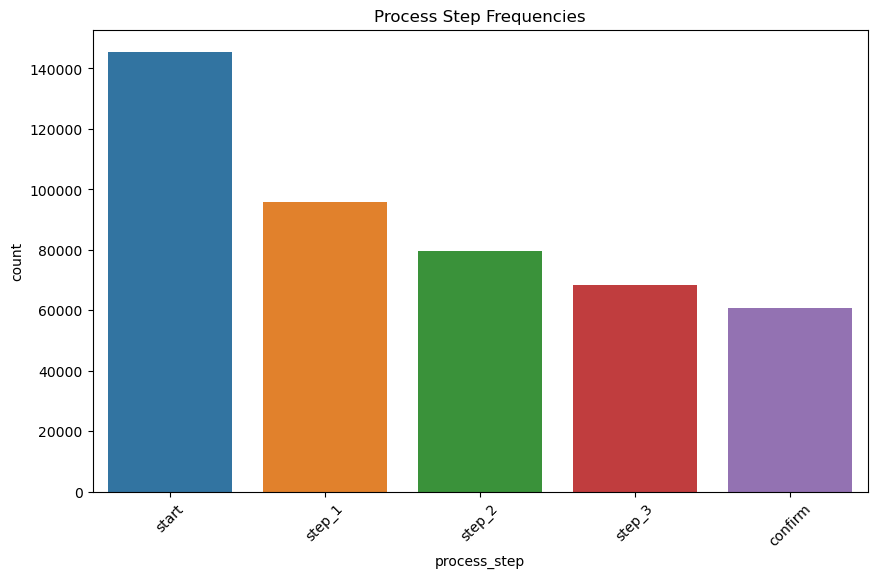

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='process_step', order=df['process_step'].value_counts().index)
plt.title('Process Step Frequencies')
plt.xticks(rotation=45)
plt.show()

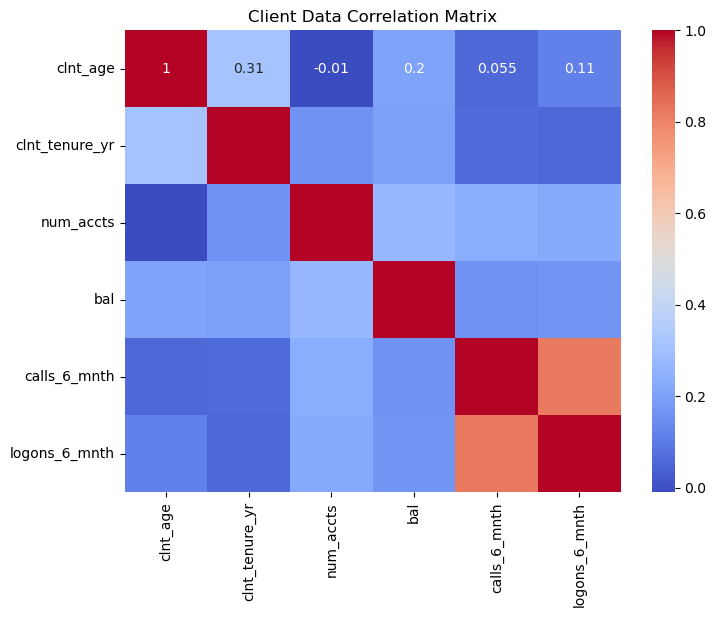

In [19]:
client_numerical_cols = ['clnt_age', 'clnt_tenure_yr', 'num_accts', 'bal', 'calls_6_mnth', 'logons_6_mnth']
client_corr = df[client_numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(client_corr, annot=True, cmap="coolwarm")
plt.title('Client Data Correlation Matrix')
plt.show()